# Data process

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_boston()
features = dataset.data
labels = dataset.target

Nsplit = 50
X_train, y_train = features[:-Nsplit], labels[:-Nsplit]
X_test, y_test = features[-Nsplit:], labels[-Nsplit:]

#################  train process ####################
[data_num,feature_num]=np.shape(X_train)
train_split = int(data_num*0.9)
train_verif = data_num -train_split

X_train_new = X_train[np.arange(train_split),:] 
mean = np.mean(X_train_new,axis=0)
std = np.std(X_train_new,axis=0)

for i in range(data_num):
    for j in range(feature_num):
        X_train[i][j] = (X_train[i][j]-mean[j])/std[j]

X_train = np.insert(X_train,0,1,axis = 1)
X_train_new = X_train[np.arange(train_split),:]
X_train_verif = X_train[np.arange(train_split,data_num),:]
[train_split,feature_num]=np.shape(X_train_new)

y_train_verif = y_train[np.arange(train_split,data_num)]
###################    text process ######################
[data_num2,feature_num2]=np.shape(X_test)
for i in range(data_num2):
    for j in range(feature_num2):
        X_test[i][j] = (X_test[i][j]-mean[j])/std[j]
X_test = np.insert(X_test,0,1,axis = 1)
#mean = np.mean(X_train,axis=0)
#std = np.std(X_train,axis=0) 
[data_num2,feature_num2]=np.shape(X_test)
X_test =X_test.reshape(data_num2,feature_num2)
y_test =y_test.reshape(data_num2,1)


[data_num,feature_num]=np.shape(X_train)
train_split = int(data_num*0.9)
train_verif = data_num -train_split
X_train_new = X_train[np.arange(train_split),:] 
X_train_verif = X_train[np.arange(train_split,data_num),:]

# Train 90% Data

In [2]:
lambda_value = 0.1*np.asarray(range(6))
w_lambda =[]
for i in lambda_value:
    w = (np.linalg.inv(X_train_new.T@X_train_new+ i*train_split*np.identity(feature_num))
        @X_train_new.T@y_train[np.arange(train_split)])
    w_lambda.append(w)

# Error for Verif and Test

In [4]:
error_test=[]
error_verif=[]
for w in w_lambda:
    er_test = (X_test@np.reshape(w,(14,1))-y_test)
    error_test.append(np.sqrt(1/data_num2*(er_test.T@er_test)))
    er_verif = (X_train_verif@w-y_train_verif)
    error_verif.append(np.sqrt(1/train_verif*(er_verif.T@er_verif)))

verifi error is  [7.845640278971592, 5.495070249342686, 4.543954723078737, 4.484448301326924, 4.930339746844782, 5.57508121459176]


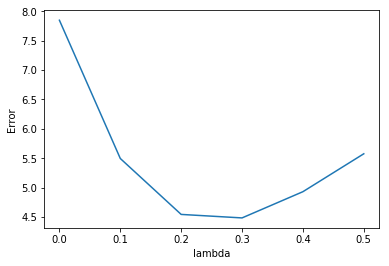

In [5]:
plt.plot(lambda_value,np.reshape(error_verif,(6,1)))
#plt.title("Verrifi_err VS lambda")
plt.xlabel('lambda')
plt.ylabel('Error')
#plt.legend(labels = ['Verrifi'], loc = 'best')
#print('The min verif error pos is :',pos)
print('verifi error is ', error_verif)
#plt.savefig("Verrifi_err VS lambda.png")

test error is  [array([[4.22655365]]), array([[3.18380157]]), array([[3.92160042]]), array([[5.11613125]]), array([[6.29716462]]), array([[7.36843458]])]


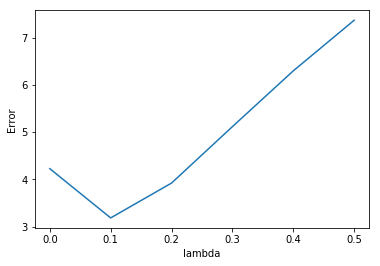

In [6]:
plt.plot(lambda_value,np.reshape(error_test,(6,1)))
#plt.title("Test_err VS lambda")
plt.xlabel('lambda')
plt.ylabel('Error')
#plt.legend(labels = ['Test'], loc = 'best')
print('test error is ', error_test)
#plt.savefig("Test_err VS lambda.png")